In [1]:
import pandas as pd

In [2]:
stk_data=pd.read_csv("Tatacoffee13_21.csv")

In [3]:
stk_data

,Date,Open,High,Low,Close
0,2013-01-01,1410.60,1427.90,1408.30,1415.10
1,2013-01-02,1421.00,1626.60,1416.15,1607.40
2,2013-01-03,1632.55,1673.90,1613.05,1626.20
3,2013-01-04,1627.75,1627.75,1574.60,1579.05
4,2013-01-07,1580.00,1639.50,1565.50,1595.65
...,...,...,...,...,...
2220,2021-12-22,202.90,207.80,201.35,205.00
2221,2021-12-23,206.00,206.85,202.05,202.95
2222,2021-12-24,203.90,203.90,199.35,201.00
2223,2021-12-27,200.00,222.00,196.00,218.35


In [25]:
stk_data.tail(20)

,Open,High,Low,Close
2205,204.65,208.90,203.05,204.50
2206,205.70,206.00,203.40,205.35
2207,205.00,207.80,203.50,204.35
2208,206.90,206.90,202.00,202.50
2209,207.00,214.40,204.10,212.40
2210,213.00,215.80,210.50,213.50
2211,213.50,215.00,211.25,212.80
2212,213.00,219.25,212.10,216.45
2213,218.25,218.25,213.10,214.65
2214,214.70,214.70,211.65,212.95


In [4]:
stk_data=stk_data[["Open","High","Low","Close"]]
#stk_data.to_csv("Tatacoffee13_21.csv")

In [5]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data)
print("Len:",data1.shape)

Len: (2225, 4)


In [7]:
data1

,Open,High,Low,Close
0,0.849900,0.845408,0.856100,0.854203
1,0.856394,0.967399,0.861040,0.974481
2,0.988480,0.996439,0.984959,0.986240
3,0.985483,0.968105,0.960760,0.956749
4,0.955669,0.975319,0.955033,0.967132
...,...,...,...,...
2220,0.095842,0.096329,0.096510,0.097323
2221,0.097777,0.095745,0.096951,0.096041
2222,0.096466,0.093934,0.095252,0.094821
2223,0.094031,0.105047,0.093143,0.105673


In [6]:
data1=pd.DataFrame(data1,columns=["Open","High","Low","Close"])

In [8]:
data1

,Open,High,Low,Close
0,0.849900,0.845408,0.856100,0.854203
1,0.856394,0.967399,0.861040,0.974481
2,0.988480,0.996439,0.984959,0.986240
3,0.985483,0.968105,0.960760,0.956749
4,0.955669,0.975319,0.955033,0.967132
...,...,...,...,...
2220,0.095842,0.096329,0.096510,0.097323
2221,0.097777,0.095745,0.096951,0.096041
2222,0.096466,0.093934,0.095252,0.094821
2223,0.094031,0.105047,0.093143,0.105673


In [9]:
training_size = round(len(data1 ) * 0.80)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size:]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

1780
X_train length: (1780, 4)
X_test length: (445, 4)
y_train length: (1780, 4)
y_test length: (445, 4)


In [17]:
import pandas as pd
from statsmodels.tsa.api import VAR
from statsmodels.tsa.api import VARMAX
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


In [20]:
# Select optimal lag order using AIC with VAR
var_model = VAR(X_train)
lag_order = var_model.select_order(maxlags=15)
optimal_order = lag_order.aic
print(f'Optimal lag order: {optimal_order}')


Optimal lag order: 13


In [21]:
# Define and fit the VARMA model with optimal lag order
model = VARMAX(X_train, order=(optimal_order, 1))
varma_model = model.fit(disp=False)

# Print the summary of the model
print(varma_model.summary())


C:\Users\udhaya\Anaconda3\envs\aim1\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


                                  Statespace Model Results                                  
Dep. Variable:     ['Open', 'High', 'Low', 'Close']   No. Observations:                 1780
Model:                                  VARMA(13,1)   Log Likelihood               26491.899
                                        + intercept   AIC                         -52507.798
Date:                              Fri, 07 Jun 2024   BIC                         -51202.519
Time:                                      08:19:29   HQIC                        -52025.698
Sample:                                           0                                         
                                             - 1780                                         
Covariance Type:                                opg                                         
Ljung-Box (L1) (Q):     0.00, 0.04, 0.25, 0.35   Jarque-Bera (JB):   161885813.90, 516411.79, 5903181.74, 105483.24
Prob(Q):                0.95, 0.83, 0.62, 0.55 

In [22]:
# Forecast the next five days
n_forecast = 5
forecast = varma_model.forecast(steps=n_forecast)
forecast = pd.DataFrame(forecast, columns=["Open", "High", "Low", "Close"])

# Inverse transform the forecast to the original scale
forecast_original_scale = Ms.inverse_transform(forecast)
forecast_original_scale = pd.DataFrame(forecast_original_scale, columns=["Open", "High", "Low", "Close"])

print("Next five days forecast:")
print(forecast_original_scale)


Next five days forecast:
        Open       High        Low      Close
0  69.244858  72.269685  66.305526  68.889944
1  71.155986  73.560311  68.487319  71.525620
2  73.724858  74.801571  71.606689  72.926299
3  73.420555  74.506469  70.780387  72.197323
4  73.444775  76.251031  71.263368  73.855042


Open:
  Mean Squared Error (MSE): 0.0035297079956426248
  Root Mean Squared Error (RMSE): 0.059411345681129164
  Mean Absolute Percentage Error (MAPE): inf%
High:
  Mean Squared Error (MSE): 0.003496250076050215
  Root Mean Squared Error (RMSE): 0.05912909669570655
  Mean Absolute Percentage Error (MAPE): inf%
Low:
  Mean Squared Error (MSE): 0.0035420944165487018
  Root Mean Squared Error (RMSE): 0.05951549728052939
  Mean Absolute Percentage Error (MAPE): inf%
Close:
  Mean Squared Error (MSE): 0.0035283586178303447
  Root Mean Squared Error (RMSE): 0.059399988365574155
  Mean Absolute Percentage Error (MAPE): inf%


C:\Users\udhaya\Anaconda3\envs\aim1\lib\site-packages\pandas\core\indexes\range.py:839: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return super().__getitem__(key)
C:\Users\udhaya\Anaconda3\envs\aim1\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\udhaya\Anaconda3\envs\aim1\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


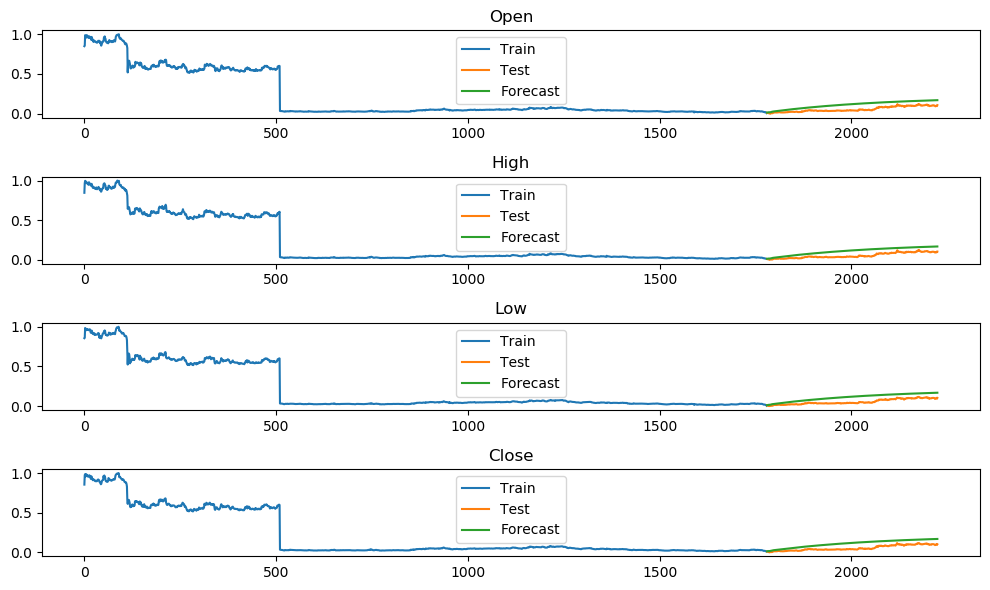

In [23]:
# Make predictions for the test set
n_test_forecast = len(X_test)
pred = varma_model.forecast(steps=n_test_forecast)
pred = pd.DataFrame(pred, columns=["Open", "High", "Low", "Close"])

# Evaluate the model
for col in data1.columns:
    mse = mean_squared_error(X_test[col], pred[col])
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((X_test[col] - pred[col]) / X_test[col])) * 100
    print(f'{col}:')
    print(f'  Mean Squared Error (MSE): {mse}')
    print(f'  Root Mean Squared Error (RMSE): {rmse}')
    print(f'  Mean Absolute Percentage Error (MAPE): {mape}%')

# Plot the results
plt.figure(figsize=(10, 6))

for i, col in enumerate(data1.columns):
    plt.subplot(len(data1.columns), 1, i+1)
    plt.plot(X_train.index, X_train[col], label='Train')
    plt.plot(X_test.index, X_test[col], label='Test')
    plt.plot(pred.index, pred[col], label='Forecast')
    plt.title(col)
    plt.legend()

plt.tight_layout()
plt.show()
